In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
    break
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [174]:
dataframe = pd.read_csv("/kaggle/input/nifty50-stock-market-data/ADANIPORTS.csv")
dataframe.head(5)
df_open = dataframe["Open"].tolist()
counter = [i for i in range(0, len(df_open))]

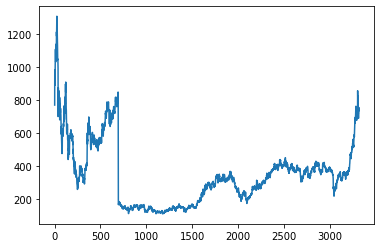

In [175]:
import matplotlib.pyplot as plt
plt.plot(counter,df_open)
plt.show()

In [176]:
array_has_nan = np.isnan(np.array(df_open))
count = 0
list_indices = []
for i,el in enumerate(array_has_nan):
    if el:
        count+=1
        list_indices.append(i)
# print(count)

In [177]:
df_open = [x for x in df_open if str(x) != "nan"]
for index in list_indices:
    print(df_open[index])

In [189]:
import sklearn.preprocessing
import numpy as np
scaler = sklearn.preprocessing.MinMaxScaler((0,1))
normalized_op = scaler.fit(np.array(df_open).reshape(-1,1)).transform(np.array(df_open).reshape(-1,1))

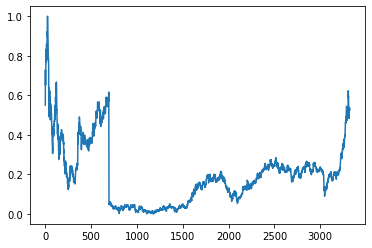

In [190]:
import matplotlib.pyplot as plt
counter = [i for i in range(0, len(df_open))]
plt.plot(counter,normalized_op)
plt.show()

In [9]:
print(len(normalized_op))

3322


In [191]:
# !pip install tf-nightly
train_dataset = normalized_op[0:2000]
test_dataset = normalized_op[2000:]
train_Y = train_dataset[100:]
train_X = train_dataset[:-100]
test_Y = test_dataset[100:]
test_X = test_dataset[:-100]
print(len(train_dataset))
print(len(test_dataset))
print(len(train_Y),len(train_X))
print(len(test_Y),len(test_X))
# normalized_op = normailzed_op[:-10]
# l = len(target)
# for i in range(0,10):
#     target[l+i][] = 0

2000
1322
1900 1900
1222 1222


In [192]:
import tensorflow as tf 
with tf.device("/device:GPU:0"):
    train_dt = tf.keras.preprocessing.timeseries_dataset_from_array(train_X, targets=train_Y, sequence_length=100, sequence_stride=1, sampling_rate=1, batch_size=1, seed=21)
    test_dt = tf.keras.preprocessing.timeseries_dataset_from_array(test_X, targets=test_Y, sequence_length=100, sequence_stride=1, sampling_rate=1, batch_size=1, seed=21)

In [58]:
print(len(train_dataset))
print(len(test_dataset))
for i,batch in enumerate(train_dataset):
    if i == 1:
        print(batch)
        break

1901
1223
(<tf.Tensor: shape=(1, 50, 1), dtype=float64, numpy=
array([[[0.72863381],
        [0.66625078],
        [0.65044708],
        [0.69182782],
        [0.72946559],
        [0.79268039],
        [0.81597006],
        [0.82511957],
        [0.83343731],
        [0.80931587],
        [0.76855895],
        [0.77521314],
        [0.85830734],
        [0.85839052],
        [0.77937201],
        [0.8176336 ],
        [0.8113953 ],
        [0.8209607 ],
        [0.8875026 ],
        [0.92077355],
        [0.89948014],
        [0.96098981],
        [0.97400707],
        [1.        ],
        [0.99563319],
        [0.97384072],
        [0.94156789],
        [0.94156789],
        [0.90829694],
        [0.89582034],
        [0.84840923],
        [0.81048035],
        [0.77987108],
        [0.78020378],
        [0.78353088],
        [0.75025993],
        [0.73778332],
        [0.49241006],
        [0.54231649],
        [0.63797047],
        [0.59222292],
        [0.60469952],
        [0.60

In [197]:
from tensorflow import keras
from tensorflow.keras import layers

model =  keras.Sequential()
model.add(layers.LSTM(512, return_sequences=True))
model.add(layers.Dropout(rate=0.2))
model.add(layers.LSTM(256, return_sequences=False))
model.add(layers.Dropout(rate=0.2))
# model.add(layers.LSTM(60, return_sequences=True))
# model.add(layers.Dropout(rate=0.2))
# model.add(layers.LSTM(60, return_sequences=False))
# model.add(layers.Dropout(rate=0.2))
# model.add(layers.Dense(512))
# model.add(layers.Dropout(rate=0.2))
# model.add(layers.Dense(256))
# model.add(layers.Dropout(rate=0.2))
# model.add(layers.Dense(128))
# model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(1))

for batch in train_dt:
    print(model(batch[0]))
    break
model.summary()

tf.Tensor([[0.0028453]], shape=(1, 1), dtype=float32)
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_134 (LSTM)              (1, 100, 512)             1052672   
_________________________________________________________________
dropout_163 (Dropout)        (1, 100, 512)             0         
_________________________________________________________________
lstm_135 (LSTM)              (1, 256)                  787456    
_________________________________________________________________
dropout_164 (Dropout)        (1, 256)                  0         
_________________________________________________________________
dense_91 (Dense)             (1, 1)                    257       
Total params: 1,840,385
Trainable params: 1,840,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.debugging.set_log_device_placement(True)

gpus = tf.config.experimental.list_logical_devices('GPU')
print(gpus)

In [198]:
checkpoint_path = "/kaggle/output/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)
with tf.device("/device:GPU:0"):
    NUM_EPOCHS = 100
    model.compile(
        loss=keras.losses.MeanSquaredError(),
        optimizer=opt,
        metrics=[tf.keras.metrics.MeanSquaredError()],
    )
    model.fit(
        train_dt, validation_data=test_dt, epochs=100, callbacks=[cp_callback]
    )
# for i in range(0,NUM_EPOCHS):
#     for dataset in train_dataset:
#         output_ = model(dataset[0])
#         original_op = dataset[1]       

Epoch 1/100
1801/1801 [==============================] - 28s 14ms/step - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0090 - val_mean_squared_error: 0.0090

Epoch 00001: val_loss improved from inf to 0.00901, saving model to /kaggle/output/training_1/cp.ckpt
Epoch 2/100
1801/1801 [==============================] - 25s 14ms/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0060 - val_mean_squared_error: 0.0060

Epoch 00002: val_loss improved from 0.00901 to 0.00596, saving model to /kaggle/output/training_1/cp.ckpt
Epoch 3/100
1801/1801 [==============================] - 25s 14ms/step - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0052 - val_mean_squared_error: 0.0052

Epoch 00003: val_loss improved from 0.00596 to 0.00521, saving model to /kaggle/output/training_1/cp.ckpt
Epoch 4/100
1801/1801 [==============================] - 25s 14ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0047 - val_mean_squared_error: 0.0047

Epoch 00004: v

KeyboardInterrupt: 

In [ ]:
print(model)

In [201]:
predictions_tr = []
for i,dataset in enumerate(test_dt):
    predictions_tr.append(model.predict(dataset[0]).tolist()[0][0])
#     print(predictions)
#     if i==9:
#         break
# print(predictions)
# print(len(test_dataset))
# print(model.predict(dataset[0]))

In [22]:
print(len(predictions))
print(len(test_Y))

1223
1272


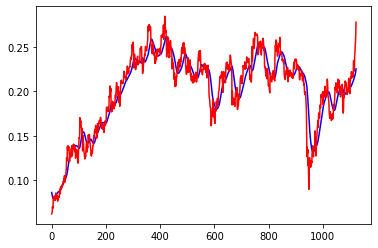

In [204]:
# predictions_tr = predictions_tr[0:10]
cnt = [i for i in range(0, len(predictions_tr))]
plt.plot(cnt, predictions_tr,'b')
plt.plot(cnt, test_Y[:len(predictions_tr)],'r')
plt.show()

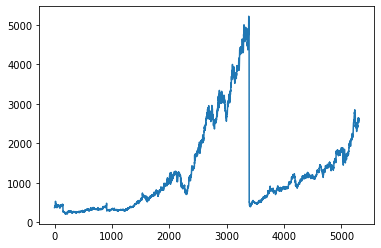

In [205]:
dataframe = pd.read_csv("/kaggle/input/nifty50-stock-market-data/ASIANPAINT.csv")
dataframe.head(5)
df_open = dataframe["Open"].tolist()
counter = [i for i in range(0, len(df_open))]
import matplotlib.pyplot as plt
plt.plot(counter,df_open)
plt.show()

In [206]:
array_has_nan = np.isnan(np.array(df_open))
count = 0
list_indices = []
for i,el in enumerate(array_has_nan):
    if el:
        count+=1
        list_indices.append(i)

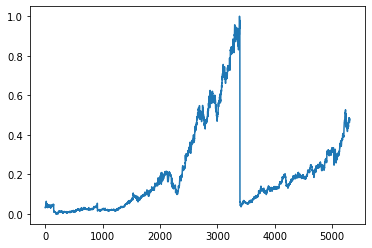

In [208]:
df_open = [x for x in df_open if str(x) != "nan"]
for index in list_indices:
    print(df_open[index])
import sklearn.preprocessing
import numpy as np
scaler = sklearn.preprocessing.MinMaxScaler((0,1))
normalized_op = scaler.fit(np.array(df_open).reshape(-1,1)).transform(np.array(df_open).reshape(-1,1))
import matplotlib.pyplot as plt
counter = [i for i in range(0, len(df_open))]
plt.plot(counter,normalized_op)
plt.show()

In [210]:
test_Y = normalized_op[100:]
test_X = normalized_op[:-100]
with tf.device("/device:GPU:0"):
    test_dt = tf.keras.preprocessing.timeseries_dataset_from_array(test_X, targets=test_Y, sequence_length=100, sequence_stride=1, sampling_rate=1, batch_size=1, seed=21)

In [211]:
predictions_tr = []
for i,dataset in enumerate(test_dt):
    predictions_tr.append(model.predict(dataset[0]).tolist()[0][0])

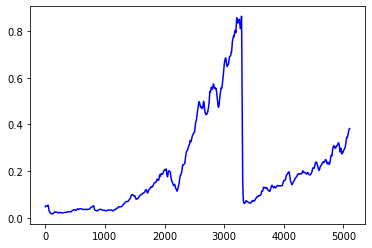

In [212]:
cnt = [i for i in range(0, len(predictions_tr))]
plt.plot(cnt, predictions_tr,'b')
# plt.plot(cnt, test_Y[:len(predictions_tr)],'r')
plt.show()

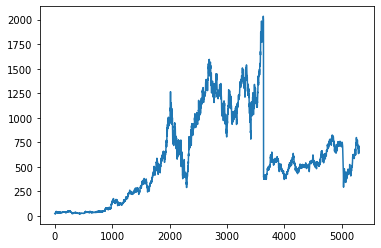

In [213]:
dataframe = pd.read_csv("/kaggle/input/nifty50-stock-market-data/AXISBANK.csv")
dataframe.head(5)
df_open = dataframe["Open"].tolist()
counter = [i for i in range(0, len(df_open))]
import matplotlib.pyplot as plt
plt.plot(counter,df_open)
plt.show()

In [214]:
array_has_nan = np.isnan(np.array(df_open))
count = 0
list_indices = []
for i,el in enumerate(array_has_nan):
    if el:
        count+=1
        list_indices.append(i)

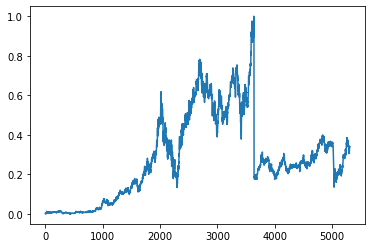

In [215]:
df_open = [x for x in df_open if str(x) != "nan"]
for index in list_indices:
    print(df_open[index])
import sklearn.preprocessing
import numpy as np
scaler = sklearn.preprocessing.MinMaxScaler((0,1))
normalized_op = scaler.fit(np.array(df_open).reshape(-1,1)).transform(np.array(df_open).reshape(-1,1))
import matplotlib.pyplot as plt
counter = [i for i in range(0, len(df_open))]
plt.plot(counter,normalized_op)
plt.show()

In [216]:
test_Y = normalized_op[100:]
test_X = normalized_op[:-100]
with tf.device("/device:GPU:0"):
    test_dt = tf.keras.preprocessing.timeseries_dataset_from_array(test_X, targets=test_Y, sequence_length=100, sequence_stride=1, sampling_rate=1, batch_size=1, seed=21)

In [217]:
predictions_tr = []
for i,dataset in enumerate(test_dt):
    predictions_tr.append(model.predict(dataset[0]).tolist()[0][0])

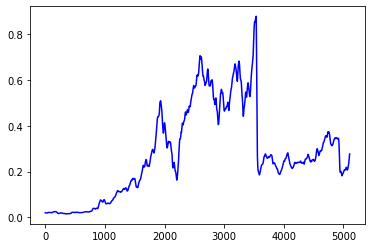

In [218]:
cnt = [i for i in range(0, len(predictions_tr))]
plt.plot(cnt, predictions_tr,'b')
# plt.plot(cnt, test_Y[:len(predictions_tr)],'r')
plt.show()